In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
all_data = pd.read_csv('all_data.csv', index_col=0)
PM25 = pd.read_csv('PM25.csv', index_col=0)
model_data = all_data = pd.concat([all_data, PM25], axis=1)
model_data = model_data.rename(columns={model_data.columns[-1]: "PM2.5"})
model_data = model_data.dropna(subset=["PM2.5"])
model_data

X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=False)

In [5]:
import optuna
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def objective(trial):
    X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
    y = model_data["PM2.5"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)

    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])

    model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    return r2

study = optuna.create_study(direction='maximize')

improvement_threshold = 0.001
stale_count = 0

best_r2 = -float('inf')

r2_values = []

for _ in range(11000):
    study.optimize(objective, n_trials=1)

    if study.best_value > best_r2:
        best_r2 = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    r2_values.append(best_r2)

    if stale_count >= 11000 or best_r2 >= 1.0:
        break

best_params = study.best_params
best_r2 = study.best_value

print("Najlepsze parametry:", best_params)
print("Najlepszy R^2 Score:", best_r2)


[I 2023-10-22 19:03:08,103] A new study created in memory with name: no-name-b387ccf7-9abd-4f6c-9366-060b87542825
[I 2023-10-22 19:03:08,144] Trial 0 finished with value: 0.5518214322555389 and parameters: {'n_neighbors': 34, 'weights': 'distance'}. Best is trial 0 with value: 0.5518214322555389.


[I 2023-10-22 19:03:08,166] Trial 1 finished with value: 0.5035714252686238 and parameters: {'n_neighbors': 21, 'weights': 'distance'}. Best is trial 0 with value: 0.5518214322555389.
[I 2023-10-22 19:03:08,179] Trial 2 finished with value: 0.5504162029637574 and parameters: {'n_neighbors': 5, 'weights': 'uniform'}. Best is trial 0 with value: 0.5518214322555389.
[I 2023-10-22 19:03:08,191] Trial 3 finished with value: 0.45769611800184784 and parameters: {'n_neighbors': 29, 'weights': 'distance'}. Best is trial 0 with value: 0.5518214322555389.
[I 2023-10-22 19:03:08,203] Trial 4 finished with value: 0.7372341533417643 and parameters: {'n_neighbors': 13, 'weights': 'uniform'}. Best is trial 4 with value: 0.7372341533417643.
[I 2023-10-22 19:03:08,220] Trial 5 finished with value: 0.6109119125239384 and parameters: {'n_neighbors': 46, 'weights': 'distance'}. Best is trial 4 with value: 0.7372341533417643.
[I 2023-10-22 19:03:08,233] Trial 6 finished with value: 0.6197786732346074 and pa

Najlepsze parametry: {'n_neighbors': 10, 'weights': 'uniform'}
Najlepszy R^2 Score: 0.8017467883508655


Średni błąd kwadratowy (MSE): 124.89435661750007
Procentowa zgodność: 80.17%


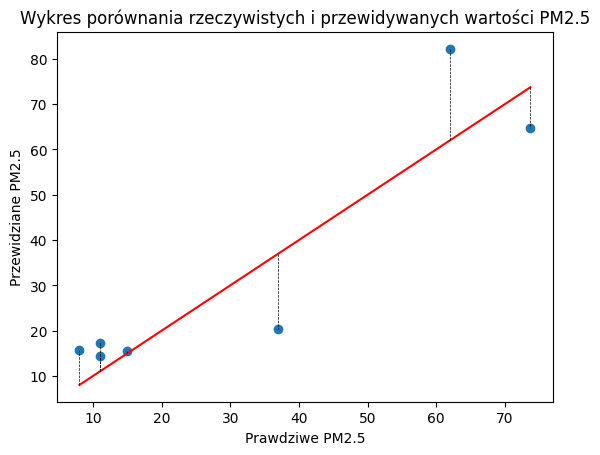

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
0,11.00,14.38900,-3.38900
1,10.98,17.21800,-6.23800
2,73.73,64.73000,9.00000
3,15.00,15.39300,-0.39300
4,8.00,15.60635,-7.60635
5,37.00,20.34900,16.65100
6,62.02,82.20900,-20.18900


In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


params =  {'n_neighbors': 10, 'weights': 'uniform'}
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data["PM2.5"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)


model = KNeighborsRegressor(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

y_test = y_test.reset_index(drop=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='y=x')
plt.scatter(y_test, y_pred)
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], 'k--', lw=0.5)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results



